In [31]:
#Exploring the files created by Helen Seroussi for ISMIP6, as part of CMIP6 hackathon paper
#Author S Buzzard 
#Last modified 30/09/21

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from pathlib import Path

#SMB files are in kg/s, total files are in Gt
#Convert SMB- multiply by 31536000 (seconds in a yr), divide by 1000000000000 (kg in a Gt)? (=mutiply by .000031536)
#No data for ILTS_PIK_SICOPOLIS1, VUB_AISMPALEO

#TODO:
#Check these units for SMB, it results in dynamic being way more important than initially suspected
#Match up experiments to ssps- convert to temperature changes to plot response to temp change vs temp change. Currently there is some pseudo data in place for temperature
#SMB files are out by half a year (won't impact but need to fix)

#To think about:
#Why do some runs have different values at 2015?
#How does dynamic loss equate to grounded vs non-grounded ice?
#Presenting these as mmSLE masks the fact that not all models start at zero (doesn't change trend but worth remembering)

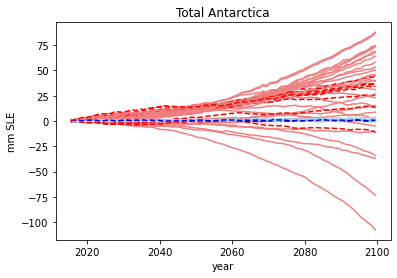

In [41]:
#Total Antarctica- all models
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]

#Average temps by experiment number
exp_avg_temp_2050=[0.949585,0.796631,1.46893,1.04221,0.971954,0.949585,0.796631,1.46893,1.04221,0.971954]
exp_avg_temp_2100=[3.60321,1.30756,4.63235,3.61523,3.37021,3.60321,1.30756,4.63235,3.61523,3.37021]

for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_all=(ds['smb'][:85]*.000031536)/361
                smb_585.append(smb_all)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_all=(ds['limnsw_total_antarctica'][:85]/361)-smb_all
                dyn_585.append(dyn_all)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                
                plt.plot(time,smb_all,'lightblue')
                plt.plot(time,dyn_all,'lightcoral')
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_all=(ds['smb'][:85]*.000031536)/361
                smb_126.append(smb_all)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_all=(ds['limnsw_total_antarctica'][:85]/361)-smb_all
                dyn_126.append(dyn_all)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                #ssp_scenario.append(126)
                
                plt.plot(time,smb_all,'b--')
                plt.plot(time,dyn_all,'r--')
            
                
#plt.plot(time,np.average(smb_585, axis=0),'k')
#plt.plot(time,np.average(dyn_585, axis=0),'k')
#plt.plot(time,np.average(smb_126, axis=0),'k--')
#plt.plot(time,np.average(dyn_126, axis=0),'k--')
plt.title('Total Antarctica')
plt.ylabel('mm SLE')
plt.xlabel('year')
plt.show()





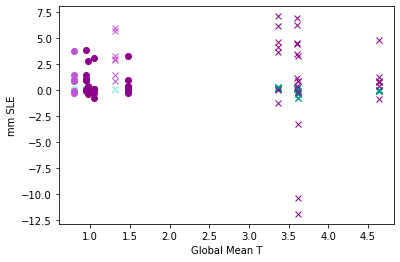

In [40]:
#Average rate of change for 2050 and for 2100 vs Temperature 

smb_585_mean_2050=[]
smb_585_mean_2100=[]
smb_126_mean_2050=[]
smb_126_mean_2100=[]
dyn_585_mean_2050=[]
dyn_585_mean_2100=[]
dyn_126_mean_2050=[]
dyn_126_mean_2100=[]

for i in range (len(smb_585)):
    smb_585_mean_2050.append(np.average(smb_585[i][:35]))
    smb_585_mean_2100.append(np.average(smb_585[i][35:]))
    dyn_585_mean_2050.append(np.average(dyn_585[i][:35]))
    dyn_585_mean_2100.append(np.average(dyn_585[i][35:]))   
for i in range (len(smb_126)):
    smb_126_mean_2050.append(np.average(smb_126[i][:35]))
    smb_126_mean_2100.append(np.average(smb_126[i][35:]))
    dyn_126_mean_2050.append(np.average(dyn_126[i][:35]))
    dyn_126_mean_2100.append(np.average(dyn_126[i][35:]))
    
plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan')
plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta')
plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise')
plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid')
plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
plt.ylabel('mm SLE')
plt.xlabel('Global Mean T')

    
plt.show()

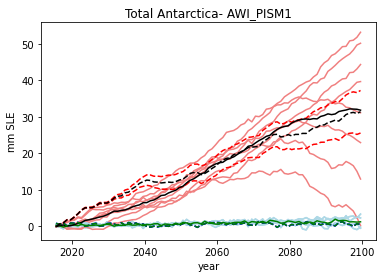

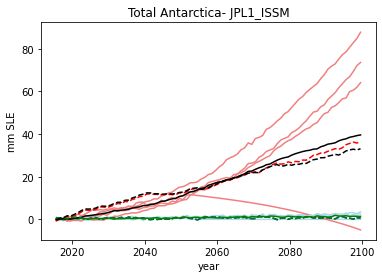

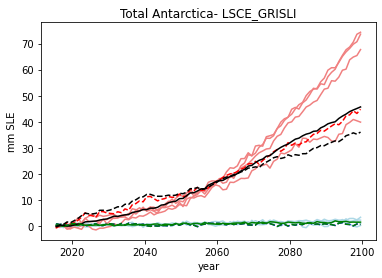

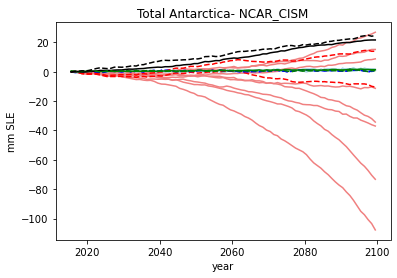

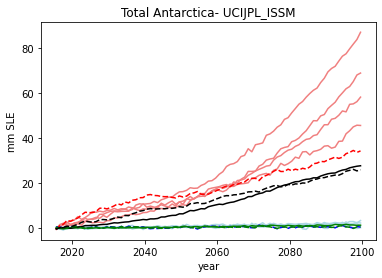

In [42]:
#Total Antarctica- by model
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]

for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_all=(ds['smb'][:85]*.000031536)/361
                smb_585.append(smb_all)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_all=(ds['limnsw_total_antarctica'][:85]/361)-smb_all
                dyn_585.append(dyn_all)
                
                plt.plot(time,smb_all,'lightblue')
                plt.plot(time,dyn_all,'lightcoral')
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_all=(ds['smb'][:85]*.000031536)/361
                smb_126.append(smb_all)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_all=(ds['limnsw_total_antarctica'][:85]/361)-smb_all
                dyn_126.append(dyn_all)
                
                plt.plot(time,smb_all,'b--')
                plt.plot(time,dyn_all,'r--')
            
                
        plt.plot(time,np.average(smb_585, axis=0),'g')
        plt.plot(time,np.average(dyn_585, axis=0),'k')
        plt.plot(time,np.average(smb_126, axis=0),'g--')
        plt.plot(time,np.average(dyn_126, axis=0),'k--')
        plt.title('Total Antarctica- '+model)
        plt.ylabel('mm SLE')
        plt.xlabel('year')
        plt.show()



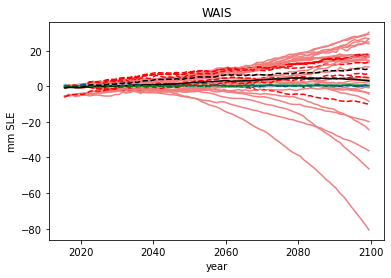

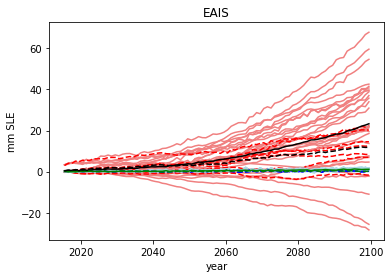

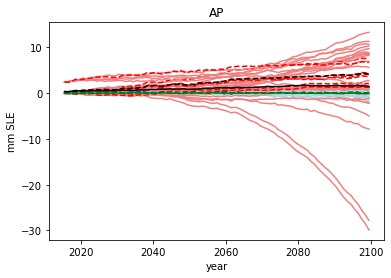

In [44]:
#By regions- all models
#Region 1 is WAIS, 2 is EAIS and 3 is AP
region_names=['WAIS','EAIS','AP']
for region in range(1,4):
    smb_585=[]
    dyn_585=[]
    smb_126=[]
    dyn_126=[]
    for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_region=(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_585.append(smb_region)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_region=(ds['limnsw_region_'+str(region)][:85]/361)-smb_region
                    dyn_585.append(dyn_region)

                    plt.plot(time,smb_region,'lightblue')
                    plt.plot(time,dyn_region,'lightcoral')
                    
            for exp in (2,7):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_region=(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_126.append(smb_region)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_region=(ds['limnsw_region_'+str(region)][:85]/361)-smb_region
                    dyn_126.append(dyn_region)

                    plt.plot(time,smb_region,'b--')
                    plt.plot(time,dyn_region,'r--')


    plt.plot(time,np.average(smb_585, axis=0),'g')
    plt.plot(time,np.average(dyn_585, axis=0),'k')
    plt.plot(time,np.average(smb_126, axis=0),'g--')
    plt.plot(time,np.average(dyn_126, axis=0),'k--')
    plt.title(region_names[region-1])
    plt.ylabel('mm SLE')
    plt.xlabel('year')
    plt.show()


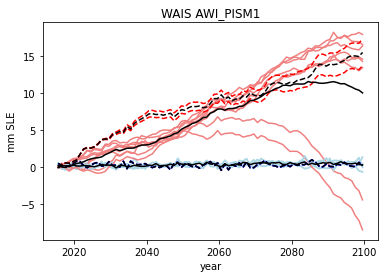

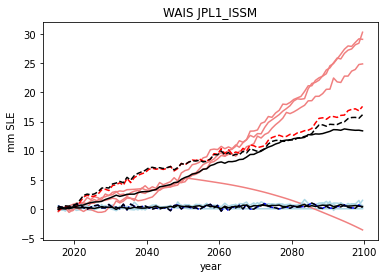

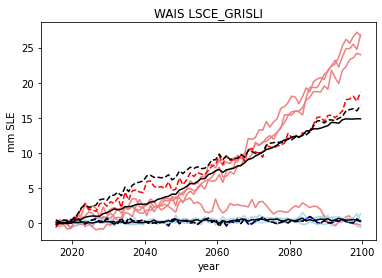

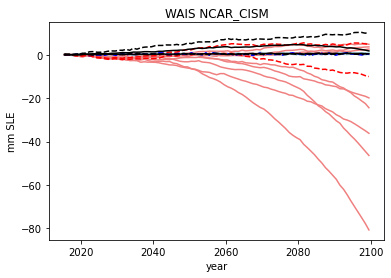

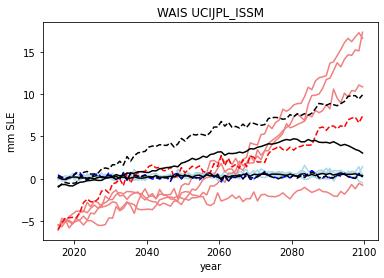

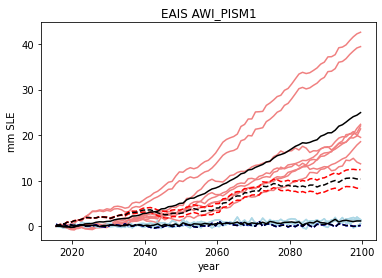

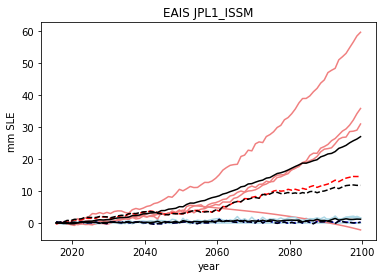

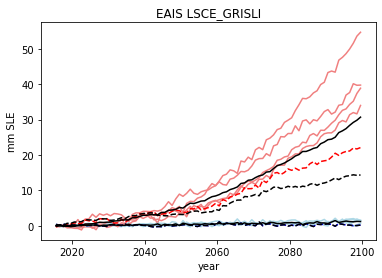

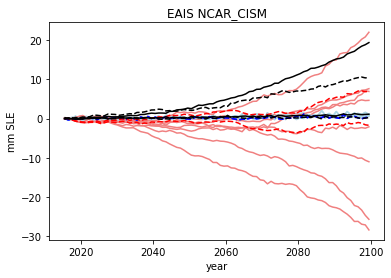

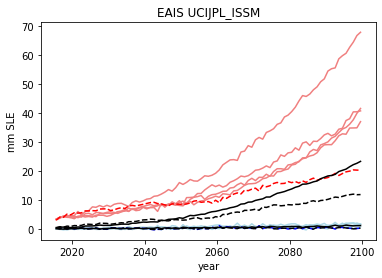

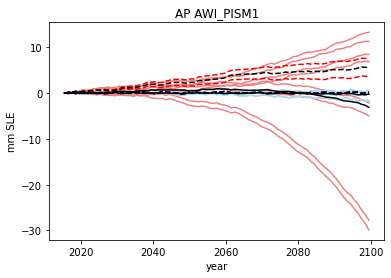

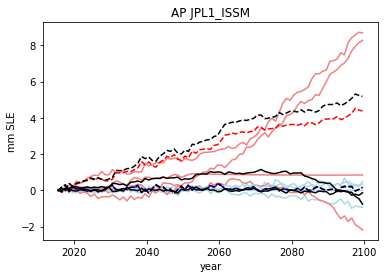

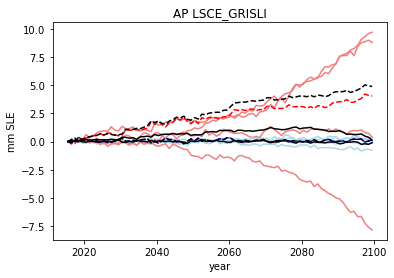

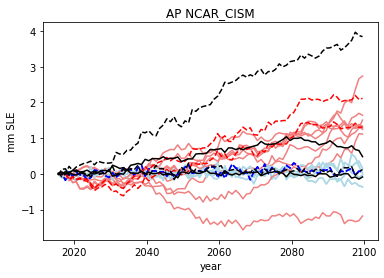

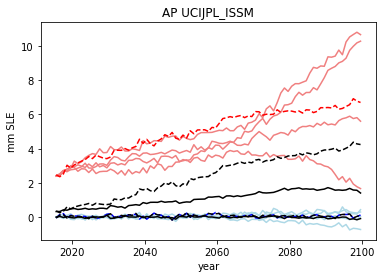

In [45]:
#By regions- by model
#Region 1 is WAIS, 2 is EAIS and 3 is AP
region_names=['WAIS','EAIS','AP']
for region in range(1,4):
    smb_585=[]
    dyn_585=[]
    smb_126=[]
    dyn_126=[]
    for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_region=(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_585.append(smb_region)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_region=(ds['limnsw_region_'+str(region)][:85]/361)-smb_region
                    dyn_585.append(dyn_region)

                    plt.plot(time,smb_region,'lightblue')
                    plt.plot(time,dyn_region,'lightcoral')
                    
            for exp in (2,7):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_region=(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_126.append(smb_region)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_region=(ds['limnsw_region_'+str(region)][:85]/361)-smb_region
                    dyn_126.append(dyn_region)

                    plt.plot(time,smb_region,'b--')
                    plt.plot(time,dyn_region,'r--')


            plt.plot(time,np.average(smb_585, axis=0),'k')
            plt.plot(time,np.average(dyn_585, axis=0),'k')
            plt.plot(time,np.average(smb_126, axis=0),'k--')
            plt.plot(time,np.average(dyn_126, axis=0),'k--')
            plt.title(region_names[region-1]+' '+model)
            plt.ylabel('mm SLE')
            plt.xlabel('year')
            plt.show()


In [18]:
#Experiments used
AWI_PISM1_expB1
AWI_PISM1_expB3
AWI_PISM1_expB4
AWI_PISM1_expB5
AWI_PISM1_expB6
AWI_PISM1_expB8
AWI_PISM1_expB9
AWI_PISM1_expB10
JPL1_ISSM_expB6
JPL1_ISSM_expB8
JPL1_ISSM_expB9
JPL1_ISSM_expB10
LSCE_GRISLI_expB6
LSCE_GRISLI_expB8
LSCE_GRISLI_expB9
LSCE_GRISLI_expB10
NCAR_CISM_expB1
NCAR_CISM_expB3
NCAR_CISM_expB4
NCAR_CISM_expB5
NCAR_CISM_expB6
NCAR_CISM_expB8
NCAR_CISM_expB9
NCAR_CISM_expB10
UCIJPL_ISSM_expB6
UCIJPL_ISSM_expB8
UCIJPL_ISSM_expB9
UCIJPL_ISSM_expB10

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])